In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as pl

from seaborn import set_style, pairplot
set_style("whitegrid")

/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [67]:
## Sklearn packages
import sklearn as sk

## statsmodel packages
import statsmodels.api as sm

from helper_functions import addline

In [68]:
home_data = pd.read_csv('data/home_data_18_19.csv',index_col=0)
away_data = pd.read_csv('data/away_data_18_19.csv',index_col=0)

In [69]:
home_data.head()

,goals,passes,possession,shots,shots_on_target,xg,opp_goals,opp_passes,opp_shots,opp_shots_on_target,Win,Draw
0,2,485.0,46.3,8.0,6.0,1.25,1,543.0,13.0,4.0,1,0
1,0,773.0,71.7,12.0,5.0,1.54,1,303.0,11.0,5.0,0,0
2,0,420.0,38.3,11.0,5.0,1.30,2,675.0,15.0,6.0,0,0
3,1,313.0,35.4,15.0,6.0,1.57,5,579.0,12.0,7.0,0,0
4,3,553.0,55.1,21.0,7.0,2.15,1,473.0,8.0,5.0,1,0


In [95]:
X = pd.DataFrame({'intercept':np.ones(home_data.shape[0] + away_data.shape[0])})
cols = ['goals','possession','shots','shots_on_target','opp_shots','opp_shots_on_target','opp_goals']
for col in cols:
    X[col] = list(home_data[col]) + list(away_data[col])
y = np.vstack([home_data[['xg']].values.reshape((-1,1)), away_data[['xg']].values.reshape((-1,1))])

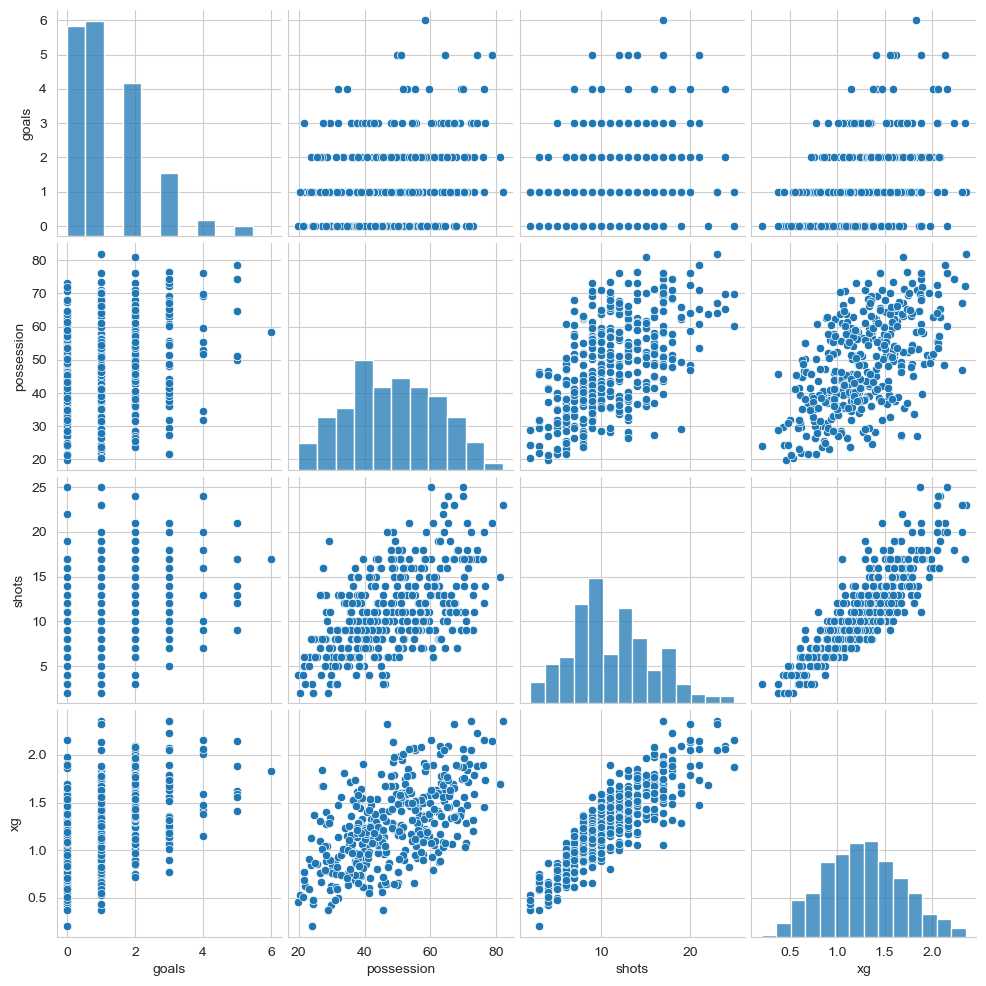

In [71]:
pairplot(away_data[cols[:3]+['xg']])

#### How does Expected goals (XG) depends on possession and shots?

In [96]:
fit_on = ['intercept','possession','shots','shots_on_target']
model = sm.OLS(y,X[fit_on])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     3639.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:36:08   Log-Likelihood:                 507.07
No. Observations:                 760   AIC:                            -1006.
Df Residuals:                     756   BIC:                            -987.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.1999      0.017     11.781      0.000       0.167       0.233
possession          0.0047      0.000     11.834      0.000       0.004       0.006
shots               0.0461      0.001     36.161      0.000       0.044       0.049
shots_on_target     0.0870      0.002     35.401      0.000       0.082       0.092
==============================================================================
Omnibus:                        6.821   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                8.006
Skew:                           0.125   Prob(JB):                       0.0183
Kurtosis:                       3.436   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the coeficient for possession is small. Let us try to fit without possession feature.

In [84]:
fit_on = ['intercept','possession','shots','shots_on_target']
model = sm.OLS(y,X[fit_on])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     3639.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:31:10   Log-Likelihood:                 507.07
No. Observations:                 760   AIC:                            -1006.
Df Residuals:                     756   BIC:                            -987.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.1999      0.017     11.781      0.000       0.167       0.233
possession          0.0047      0.000     11.834      0.000       0.004       0.006
shots               0.0461      0.001     36.161      0.000       0.044       0.049
shots_on_target     0.0870      0.002     35.401      0.000       0.082       0.092
==============================================================================
Omnibus:                        6.821   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                8.006
Skew:                           0.125   Prob(JB):                       0.0183
Kurtosis:                       3.436   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see a decline in value of $R^2$ from 0.935 to 0.923. This implies that possession indeed accounts for some variance in the observed output. Though this dependence is very weak. For practical purpose, the most important features are 'shots' and 'shots_on_target'. The attacking team should therefore focus more on shots and less possession to have better expected goals (XG).

Let us now also include defensive stats 'opp_shots' and 'opp_shots_on_target'. This will help us explain if preventing the opponents from taking shots at goal lead to significant increase in expecetd goals.

In [85]:
fit_on = ['intercept','possession','shots','shots_on_target','opp_shots','opp_goals']
model = sm.OLS(y,X[fit_on])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     2225.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:31:13   Log-Likelihood:                 514.66
No. Observations:                 760   AIC:                            -1017.
Df Residuals:                     754   BIC:                            -989.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.2843      0.031      9.254      0.000       0.224       0.345
possession          0.0042      0.000      9.596      0.000       0.003       0.005
shots               0.0449      0.001     34.446      0.000       0.042       0.048
shots_on_target     0.0876      0.002     35.826      0.000       0.083       0.092
opp_shots          -0.0041      0.001     -3.824      0.000      -0.006      -0.002
opp_goals           0.0063      0.004      1.647      0.100      -0.001       0.014
==============================================================================
Omnibus:                        6.990   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                9.010
Skew:                           0.085   Prob(JB):                       0.0111
Kurtosis:                       3.506   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We find that the shots from opposition has very less effect on $R^2$. Comparing the coef. of 'opp_goals' and 'opp_shots' it is clear that the effect of having more shots on target is about 20 times larger than preventing other team from having shots/goals. The factor of 20 is significant and should be taken into account for any team's strategy for a football game.

The coef. for 'opp_goals' is positive and is counterintuitive. However based on it's p-value and confidence interval we conclude that it has not much effect on the XG. 

#### Let us know look if the assumptions of the Linear regression are satisfied

1. Errors are uncorrelated with feature set:

We plot the residuals/errors $y_i-\hat{y}_i$ vs $y_i$. We see that the errors are uniformaly distributed hinting absence of any significant correlation between errors.

Text(0, 0.5, 'Residuals')

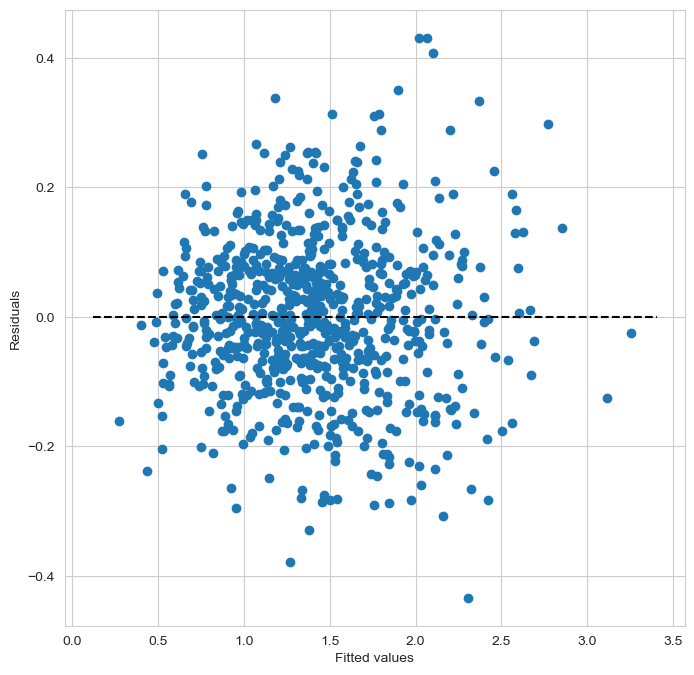

In [86]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues,result.resid)
addline(ax,0,0,'k--')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

2. Leverage points

We check to see if there are any points in the feature space which has unsually high leverage over the output XG, that is, if there points which signaficantly influence the final results.

We set the threshold to be equal to 4. If there are points with Leverage above 4 then we need to eliminate them to make the final results more robust.

We find that all points are below 4.

0.007894736842105269 0.002631578947368421


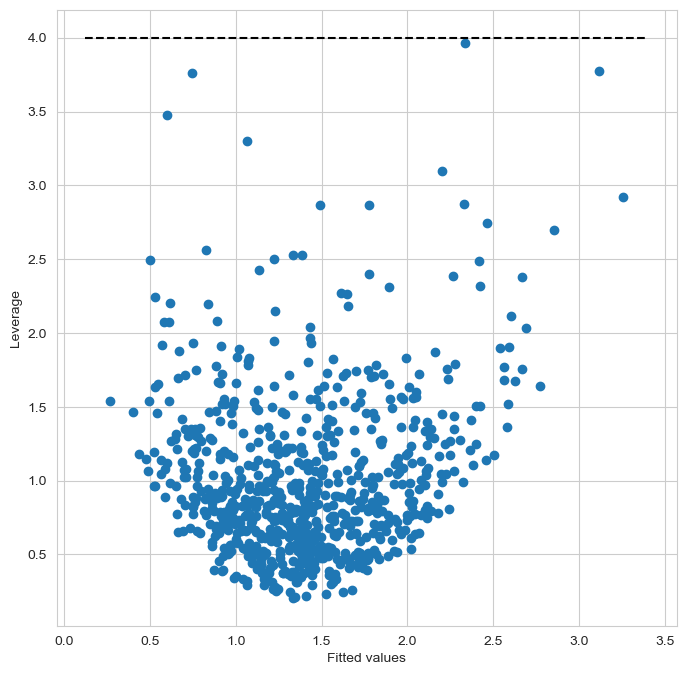

In [87]:
infl = result.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues,infl.hat_matrix_diag/np.average(infl.hat_matrix_diag))
print(np.average(infl.hat_matrix_diag),2/X.shape[0])
ax.set_xlabel('Fitted values')
ax.set_ylabel('Leverage')
addline(ax,4,0,'k--')


3. No colinearity in the feature space.

We use Variance Inflation Factor (VIF) to check if any feature is highly correlated with another feature. If so we need to remove them to have stable errors and confidence interval for our answers.

We set the threshold for VIF to be 5. If the there are feature with VIF>5 we elimiate them from the regression. We find that all VIF are less than 2.6 indicating that the fit results can be trusted.

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame(columns=['VIF'])
for i,col in enumerate(X.columns[1:]):
    var = vif(X,i+1)
    vif_df.loc[col] = [var]
    # print("VIF for {}:".format(col), var)
    # print("p-value for {}:".format(col),results.pvalues.iloc[i])
    # print()
vif_df

,VIF
goals,1.555862
possession,1.804529
shots,2.585847
shots_on_target,2.580299
opp_shots,2.585847
opp_shots_on_target,2.580299
opp_goals,1.555862
